In [1]:
!pip install spacy-readability

In [2]:
import spacy
from spacy_readability import Readability
import os

In [3]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [4]:
nlp = spacy.load("en_core_web_sm")
read = Readability()
nlp.add_pipe(read, last=True)

In [5]:
directory = os.path.join(".", "data")
documents = {}
for filename in os.listdir(directory):
    if filename.endswith(".txt"): 
        print("Reading "+os.path.join(directory, filename)+"...")
        f = open(os.path.join(directory, filename), "r")
        documents[filename] = f.read()
        f.close()

Reading .\data\A2.txt...
Reading .\data\B1.txt...
Reading .\data\B2.txt...
Reading .\data\C1.txt...
Reading .\data\C2.txt...


In [6]:
results = {}
measures = ['Flesch Grade', 'Flesch Ease', 'Dale Chall', 'Smog', 'Coleman', 'Automated', 'Forcast']
for measure in measures:
    results[measure] = []
print(results)

for document in documents:
    print(document+": "+documents[document][:100]+"...")
    doc = nlp(documents[document])
    print("Flesch grade level: "+str(doc._.flesch_kincaid_grade_level))
    results["Flesch Grade"].append(doc._.flesch_kincaid_grade_level)
    print("Flesch ease: "+str(doc._.flesch_kincaid_reading_ease))
    results["Flesch Ease"].append(doc._.flesch_kincaid_reading_ease)
    print("Dale Chall: "+str(doc._.dale_chall))
    results["Dale Chall"].append(doc._.dale_chall)
    print("Smog: "+str(doc._.smog))
    results["Smog"].append(doc._.smog)
    print("Coleman Lieau: "+str(doc._.coleman_liau_index))
    results["Coleman"].append(doc._.coleman_liau_index)
    print("Automated: "+str(doc._.automated_readability_index))
    results["Automated"].append(doc._.automated_readability_index)
    print("Forcast: "+str(doc._.forcast))
    results["Forcast"].append(doc._.forcast)
    
    print()

{'Flesch Grade': [], 'Flesch Ease': [], 'Dale Chall': [], 'Smog': [], 'Coleman': [], 'Automated': [], 'Forcast': []}
A2.txt: Spring House is located in one of the most beautiful parts of Sussex, close to the Sussex Downs and ...
Flesch grade level: 5.906691176470588
Flesch ease: 71.63886029411765
Dale Chall: 8.807617647058823
Smog: 0
Coleman Lieau: 9.361411764705881
Automated: 6.462794117647057
Forcast: 12.8

B1.txt:  I am interested in this job because I am currently looking for an opportunity to use the skills I l...
Flesch grade level: 8.31874074074074
Flesch ease: 64.27533333333334
Dale Chall: 8.338785432098765
Smog: 0
Coleman Lieau: 8.90543209876543
Automated: 7.952222222222218
Forcast: 12.2

B2.txt: We are looking for recent graduates who would like to work with some of the most important companies...
Flesch grade level: 11.533786307053944
Flesch ease: 48.14170297372064
Dale Chall: 10.594832503457814
Smog: 0
Coleman Lieau: 12.833692946058086
Automated: 12.767517289073304
Forcast:

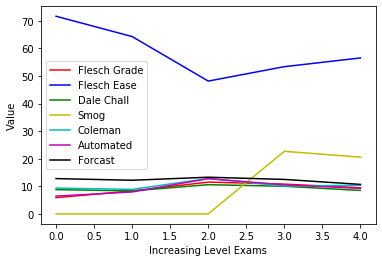

In [20]:
from numpy import *
import math
import matplotlib.pyplot as plt

x = range(len(documents))
a = results["Flesch Grade"]
b = results["Flesch Ease"]
c = results["Dale Chall"]
d = results["Smog"]
e = results["Coleman"]
f = results["Automated"]
g = results["Forcast"]

plt.plot(x, a, 'r', label="Flesch Grade") 
plt.plot(x, b, 'b', label="Flesch Ease")
plt.plot(x, c, 'g', label="Dale Chall")
plt.plot(x, d, 'y', label="Smog") 
plt.plot(x, e, 'c', label="Coleman")
plt.plot(x, f, 'm', label="Automated")
plt.plot(x, g, 'k', label="Forcast")
plt.xlabel("Increasing Level Exams")
plt.ylabel("Value")
plt.legend()
plt.show()